In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# DATA SET 1

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2001.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.340000,NaN,NaN,28079001
1,2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.110000,1.24,10.82,28079035
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.850000,NaN,NaN,28079003
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.460000,NaN,NaN,28079004
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.800000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217867,2001-04-01 00:00:00,10.45,1.81,NaN,NaN,NaN,73.000000,264.399994,NaN,5.200000,47.880001,NaN,39.910000,NaN,28.35,28079022
217868,2001-04-01 00:00:00,5.20,0.69,4.56,NaN,0.13,71.080002,129.300003,NaN,13.460000,26.809999,NaN,13.450000,1.32,16.08,28079023
217869,2001-04-01 00:00:00,0.49,1.09,NaN,1.00,0.19,76.279999,128.399994,0.35,5.020000,40.770000,0.61,14.700000,1.40,1.55,28079024
217870,2001-04-01 00:00:00,5.62,1.01,5.04,11.38,NaN,80.019997,197.000000,2.58,5.840000,37.889999,4.31,39.919998,NaN,20.75,28079025


In [3]:
b=a.fillna(value=10)
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2001-08-01 01:00:00,10.00,0.37,10.00,10.00,10.00,58.400002,87.150002,10.00,34.529999,105.000000,10.00,6.340000,10.00,10.00,28079001
1,2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.110000,1.24,10.82,28079035
2,2001-08-01 01:00:00,10.00,0.28,10.00,10.00,10.00,50.660000,61.380001,10.00,46.310001,100.099998,10.00,7.850000,10.00,10.00,28079003
3,2001-08-01 01:00:00,10.00,0.47,10.00,10.00,10.00,69.790001,73.449997,10.00,40.650002,69.779999,10.00,6.460000,10.00,10.00,28079004
4,2001-08-01 01:00:00,10.00,0.39,10.00,10.00,10.00,22.830000,24.799999,10.00,66.309998,75.180000,10.00,8.800000,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217867,2001-04-01 00:00:00,10.45,1.81,10.00,10.00,10.00,73.000000,264.399994,10.00,5.200000,47.880001,10.00,39.910000,10.00,28.35,28079022
217868,2001-04-01 00:00:00,5.20,0.69,4.56,10.00,0.13,71.080002,129.300003,10.00,13.460000,26.809999,10.00,13.450000,1.32,16.08,28079023
217869,2001-04-01 00:00:00,0.49,1.09,10.00,1.00,0.19,76.279999,128.399994,0.35,5.020000,40.770000,0.61,14.700000,1.40,1.55,28079024
217870,2001-04-01 00:00:00,5.62,1.01,5.04,11.38,10.00,80.019997,197.000000,2.58,5.840000,37.889999,4.31,39.919998,10.00,20.75,28079025


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217872 entries, 0 to 217871
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     217872 non-null  object 
 1   BEN      217872 non-null  float64
 2   CO       217872 non-null  float64
 3   EBE      217872 non-null  float64
 4   MXY      217872 non-null  float64
 5   NMHC     217872 non-null  float64
 6   NO_2     217872 non-null  float64
 7   NOx      217872 non-null  float64
 8   OXY      217872 non-null  float64
 9   O_3      217872 non-null  float64
 10  PM10     217872 non-null  float64
 11  PXY      217872 non-null  float64
 12  SO_2     217872 non-null  float64
 13  TCH      217872 non-null  float64
 14  TOL      217872 non-null  float64
 15  station  217872 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 26.6+ MB


In [5]:
b.describe()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
count,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,217872.000000,2.178720e+05
mean,7.827869,0.984893,8.228947,9.388181,6.143318,62.564470,138.744655,8.632059,31.418224,33.473621,8.578621,18.439692,6.638429,11.599438,2.807902e+07
std,3.800374,1.196236,3.517005,3.654374,4.790476,36.154049,141.277393,3.192592,26.053705,29.261800,3.262541,15.525087,4.175143,9.385868,1.947709e+01
min,0.100000,0.000000,0.140000,0.190000,0.000000,0.010000,0.020000,0.190000,0.000000,0.510000,0.150000,0.090000,0.190000,0.210000,2.807900e+07
25%,4.540000,0.380000,8.850000,10.000000,0.190000,36.139999,49.717501,10.000000,9.490000,12.600000,10.000000,8.920000,1.440000,10.000000,2.807901e+07
50%,10.000000,0.650000,10.000000,10.000000,10.000000,58.400002,96.550003,10.000000,24.639999,25.040001,10.000000,13.480000,10.000000,10.000000,2.807902e+07
75%,10.000000,1.140000,10.000000,10.000000,10.000000,82.559998,178.600006,10.000000,47.000000,44.209999,10.000000,22.610001,10.000000,10.000000,2.807902e+07
max,63.000000,18.040001,126.500000,163.699997,10.000000,586.099976,2537.000000,103.000000,177.000000,290.299988,103.000000,199.100006,10.000000,242.899994,2.807910e+07


In [6]:
c=b.head(100)
c

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2001-08-01 01:00:00,10.0,0.37,10.00,10.00,10.00,58.400002,87.150002,10.00,34.529999,105.000000,10.00,6.34,10.00,10.00,28079001
1,2001-08-01 01:00:00,1.5,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035
2,2001-08-01 01:00:00,10.0,0.28,10.00,10.00,10.00,50.660000,61.380001,10.00,46.310001,100.099998,10.00,7.85,10.00,10.00,28079003
3,2001-08-01 01:00:00,10.0,0.47,10.00,10.00,10.00,69.790001,73.449997,10.00,40.650002,69.779999,10.00,6.46,10.00,10.00,28079004
4,2001-08-01 01:00:00,10.0,0.39,10.00,10.00,10.00,22.830000,24.799999,10.00,66.309998,75.180000,10.00,8.80,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2001-08-01 04:00:00,0.9,0.22,3.49,1.98,0.08,30.930000,35.110001,1.16,61.490002,42.520000,0.82,7.15,1.31,7.96,28079099
96,2001-08-01 05:00:00,10.0,0.19,10.00,10.00,10.00,47.169998,62.630001,10.00,48.459999,49.490002,10.00,5.03,10.00,10.00,28079001
97,2001-08-01 05:00:00,0.6,0.04,0.67,1.68,0.01,30.940001,32.509998,0.74,65.559998,31.100000,0.72,6.37,1.22,5.28,28079035
98,2001-08-01 05:00:00,10.0,0.13,10.00,10.00,10.00,37.380001,42.660000,10.00,62.650002,43.230000,10.00,6.26,10.00,10.00,28079003


In [7]:
c.columns

Index(['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [8]:
d=c[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,10.0,0.37,10.00,10.00,10.00,58.400002,87.150002,10.00,34.529999,105.000000,10.00,6.34,10.00,10.00,28079001
1,1.5,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035
2,10.0,0.28,10.00,10.00,10.00,50.660000,61.380001,10.00,46.310001,100.099998,10.00,7.85,10.00,10.00,28079003
3,10.0,0.47,10.00,10.00,10.00,69.790001,73.449997,10.00,40.650002,69.779999,10.00,6.46,10.00,10.00,28079004
4,10.0,0.39,10.00,10.00,10.00,22.830000,24.799999,10.00,66.309998,75.180000,10.00,8.80,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.9,0.22,3.49,1.98,0.08,30.930000,35.110001,1.16,61.490002,42.520000,0.82,7.15,1.31,7.96,28079099
96,10.0,0.19,10.00,10.00,10.00,47.169998,62.630001,10.00,48.459999,49.490002,10.00,5.03,10.00,10.00,28079001
97,0.6,0.04,0.67,1.68,0.01,30.940001,32.509998,0.74,65.559998,31.100000,0.72,6.37,1.22,5.28,28079035
98,10.0,0.13,10.00,10.00,10.00,37.380001,42.660000,10.00,62.650002,43.230000,10.00,6.26,10.00,10.00,28079003


# LINEAR REGRESSION

In [9]:
x=d[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL']]
y=d['station']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)


28079244.736903504


In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,1.061677
CO,59.032169
EBE,4.751361
MXY,-32.586337
NMHC,120.327288
NO_2,0.230008
NOx,-1.104738
OXY,40.175435
O_3,-0.577382
PM10,0.129303


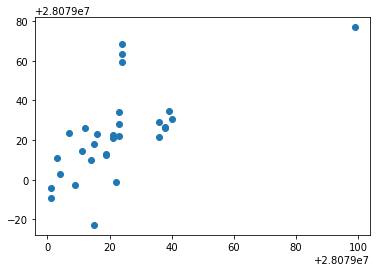

In [14]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [15]:
print(lr.score(x_test,y_test))

0.0878191645762959


In [16]:
lr.score(x_train,y_train)

0.5369386172732837

# LASSO REGRESSION

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
la.score(x_test,y_test)

0.2181076645179174

# RIDGE REGRESSION

In [20]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [21]:
rr.score(x_test,y_test)

0.12649566107007648

# LOGISTIC REGRESSION

In [22]:
w=d.iloc[:,0:14]
w1=d.iloc[:,-1]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
b=StandardScaler().fit_transform(w)


In [25]:
from sklearn.model_selection import train_test_split
b_train,b_test,w1_train,w1_test=train_test_split(b,w1,test_size=0.7)

In [26]:
p=LogisticRegression(max_iter=10000)
p.fit(b,w1)

LogisticRegression(max_iter=10000)

In [27]:
t=[[12,22,32,42,52,45,32,56,87,34,69,15,23,90]]


In [28]:
e=p.predict(t)
print(e)

[28079007]


In [29]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079009,
       28079011, 28079012, 28079014, 28079015, 28079016, 28079018,
       28079019, 28079021, 28079022, 28079023, 28079024, 28079025,
       28079035, 28079036, 28079038, 28079039, 28079040, 28079099],
      dtype=int64)

In [30]:
print(p.score(x_test,y_test))

0.03333333333333333


In [31]:
p.predict_proba(t)[0][0]

9.308013621528866e-103

In [32]:
p.predict_proba(t)[0][1]

4.881944225266194e-54

# ELASTIC NET

In [33]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [34]:
print(p.coef_)

[-0.94802829  0.          0.         -0.81326293  0.1203023   0.4729457
 -0.75169487 -0.94182476  0.06057396  0.21156167 -1.17291565  0.50250607
  0.          0.66406961]


In [35]:
print(p.intercept_)

28079041.03341329


In [36]:
print(p.predict(x_test))

[28079030.47500396 28079024.89231289 28079019.38444181 28078988.60526983
 28079021.26820801 28079022.22939836 28079022.79449344 28079019.09519175
 28079052.46105222 28079018.11024847 28079020.04693535 28078989.77456254
 28079022.383306   28079026.46562371 28079063.9131796  28079016.67929225
 28079052.88467707 28079013.34295753 28079026.65823131 28078990.72737054
 28079018.18228684 28079023.71756355 28079019.90311101 28079019.28782469
 28079009.53820333 28079023.24321778 28079012.91716642 28079015.51842358
 28079014.86525244 28079046.36065469]


In [37]:
print(p.score(x_test,y_test))

0.06505658291341299


# RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
parameters={'max_depth':[1,53,67,53,57],
  'min_samples_leaf':[5,34,67,87,45],
           'n_estimators':[23,45,67,23,56]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 67, 53, 57],
                         'min_samples_leaf': [5, 34, 67, 87, 45],
                         'n_estimators': [23, 45, 67, 23, 56]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.4

In [42]:
rfc_best=grid_search.best_estimator_

[Text(946.6071428571428, 2397.276, 'X[3] <= 7.97\ngini = 0.941\nsamples = 45\nvalue = [1, 6, 2, 6, 0, 7, 2, 3, 2, 3, 3, 3, 2, 1\n1, 1, 0, 4, 5, 3, 5, 4, 2, 4]'),
 Text(398.57142857142856, 1864.548, 'X[11] <= 7.205\ngini = 0.742\nsamples = 11\nvalue = [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 4, 5, 0, 0, 0, 0, 4]'),
 Text(199.28571428571428, 1331.82, 'gini = 0.496\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 5, 0, 0, 0, 0, 0]'),
 Text(597.8571428571429, 1331.82, 'gini = 0.5\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 4, 0, 0, 0, 0, 0, 4]'),
 Text(1494.642857142857, 1864.548, 'X[4] <= 5.05\ngini = 0.925\nsamples = 34\nvalue = [1, 6, 2, 0, 0, 7, 2, 3, 2, 3, 3, 3, 2, 1\n1, 1, 0, 0, 0, 3, 5, 4, 2, 0]'),
 Text(996.4285714285713, 1331.82, 'X[11] <= 5.59\ngini = 0.816\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 0, 0\n0, 1, 0, 0, 0, 0, 0, 0, 2, 0]'),
 Text(797.1428571428571, 799.0920000000001, 'gini = 0.653\

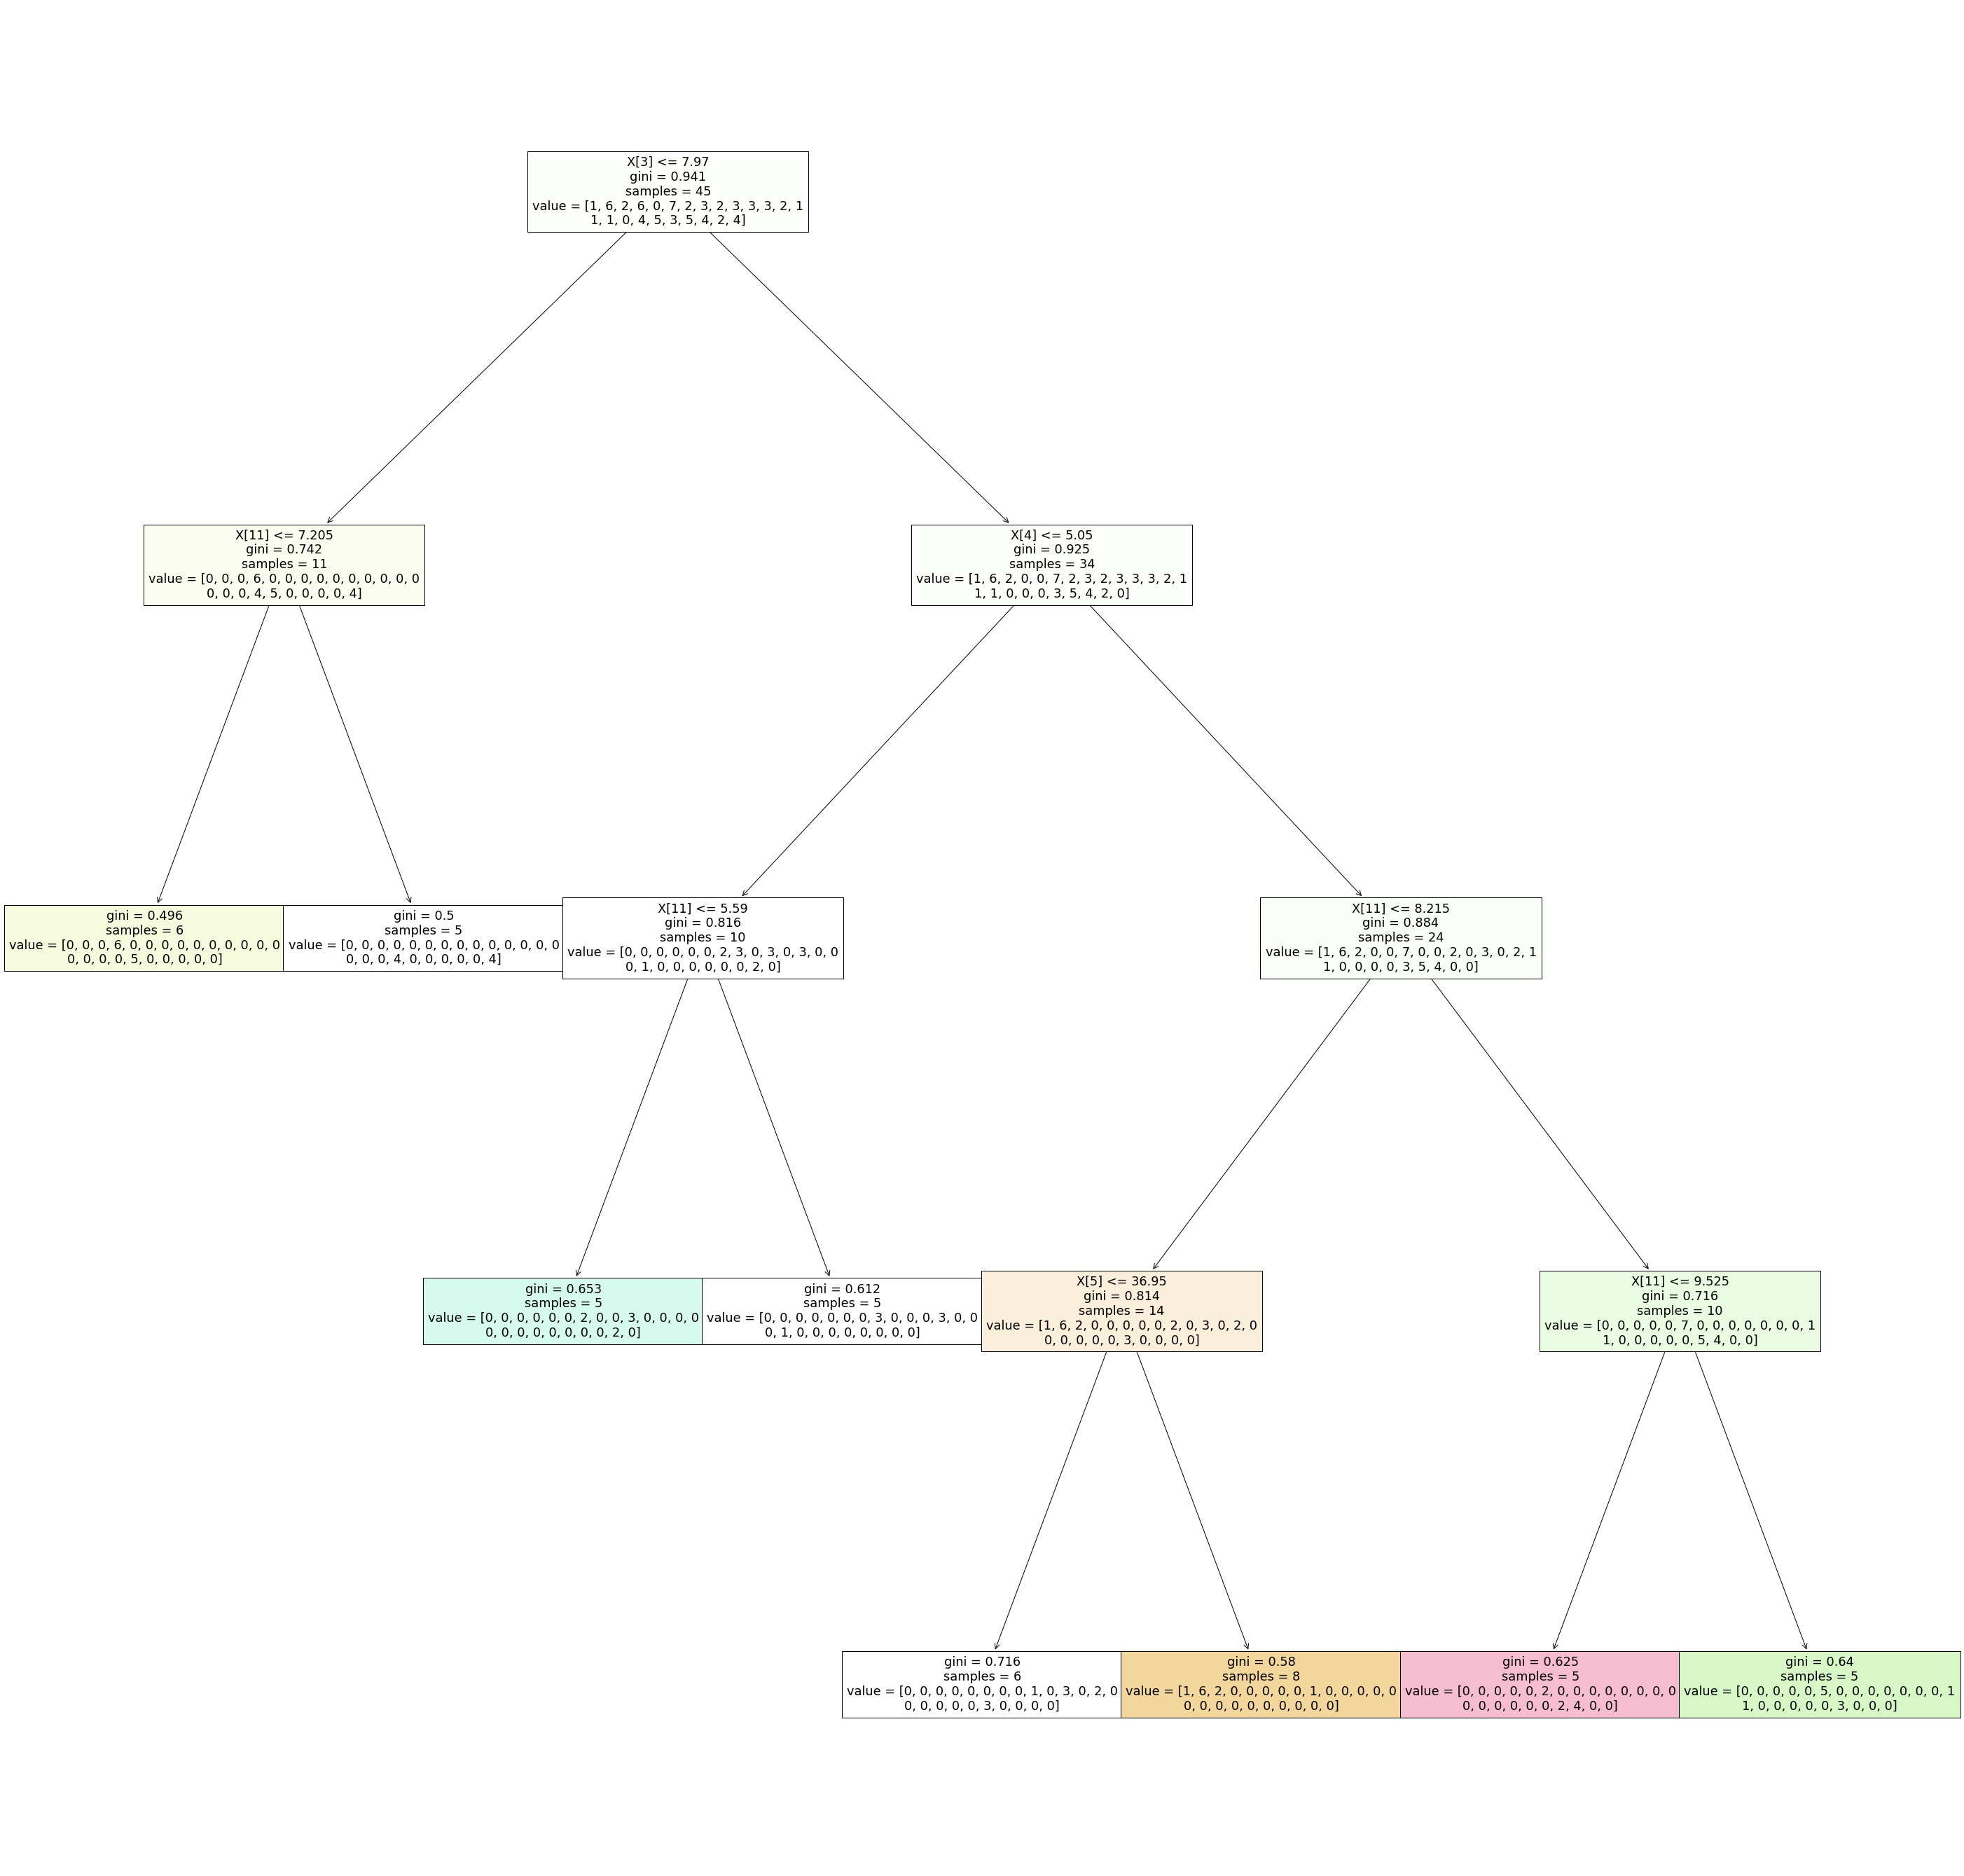

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion: Linear score=0.571866042325689 is a Highest accuracy

# DATA SET 2

In [44]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2002.csv")
s

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2002-04-01 01:00:00,NaN,1.39,NaN,NaN,NaN,145.100006,352.100006,NaN,6.54,41.990002,NaN,21.320000,NaN,NaN,28079001
1,2002-04-01 01:00:00,1.93,0.71,2.33,6.20,0.15,98.150002,153.399994,2.67,6.85,20.980000,2.53,11.660000,1.82,10.980000,28079035
2,2002-04-01 01:00:00,NaN,0.80,NaN,NaN,NaN,103.699997,134.000000,NaN,13.01,28.440001,NaN,13.670000,NaN,NaN,28079003
3,2002-04-01 01:00:00,NaN,1.61,NaN,NaN,NaN,97.599998,268.000000,NaN,5.12,42.180000,NaN,16.990000,NaN,NaN,28079004
4,2002-04-01 01:00:00,NaN,1.90,NaN,NaN,NaN,92.089996,237.199997,NaN,7.28,76.330002,NaN,15.260000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217291,2002-11-01 00:00:00,4.16,1.14,NaN,NaN,NaN,81.080002,265.700012,NaN,7.21,36.750000,NaN,13.210000,NaN,NaN,28079022
217292,2002-11-01 00:00:00,3.67,1.73,2.89,NaN,0.38,113.900002,373.100006,NaN,5.66,63.389999,NaN,15.640000,1.78,15.690000,28079023
217293,2002-11-01 00:00:00,1.37,0.58,1.17,2.37,0.15,65.389999,107.699997,1.30,9.11,9.640000,0.94,5.620000,1.43,4.330000,28079024
217294,2002-11-01 00:00:00,4.51,0.91,4.83,10.99,NaN,149.800003,202.199997,1.00,5.75,NaN,5.52,24.219999,NaN,22.129999,28079025


In [45]:
s1=s.fillna(value=4)
s1

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2002-04-01 01:00:00,4.00,1.39,4.00,4.00,4.00,145.100006,352.100006,4.00,6.54,41.990002,4.00,21.320000,4.00,4.000000,28079001
1,2002-04-01 01:00:00,1.93,0.71,2.33,6.20,0.15,98.150002,153.399994,2.67,6.85,20.980000,2.53,11.660000,1.82,10.980000,28079035
2,2002-04-01 01:00:00,4.00,0.80,4.00,4.00,4.00,103.699997,134.000000,4.00,13.01,28.440001,4.00,13.670000,4.00,4.000000,28079003
3,2002-04-01 01:00:00,4.00,1.61,4.00,4.00,4.00,97.599998,268.000000,4.00,5.12,42.180000,4.00,16.990000,4.00,4.000000,28079004
4,2002-04-01 01:00:00,4.00,1.90,4.00,4.00,4.00,92.089996,237.199997,4.00,7.28,76.330002,4.00,15.260000,4.00,4.000000,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217291,2002-11-01 00:00:00,4.16,1.14,4.00,4.00,4.00,81.080002,265.700012,4.00,7.21,36.750000,4.00,13.210000,4.00,4.000000,28079022
217292,2002-11-01 00:00:00,3.67,1.73,2.89,4.00,0.38,113.900002,373.100006,4.00,5.66,63.389999,4.00,15.640000,1.78,15.690000,28079023
217293,2002-11-01 00:00:00,1.37,0.58,1.17,2.37,0.15,65.389999,107.699997,1.30,9.11,9.640000,0.94,5.620000,1.43,4.330000,28079024
217294,2002-11-01 00:00:00,4.51,0.91,4.83,10.99,4.00,149.800003,202.199997,1.00,5.75,4.000000,5.52,24.219999,4.00,22.129999,28079025


In [46]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217296 entries, 0 to 217295
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     217296 non-null  object 
 1   BEN      217296 non-null  float64
 2   CO       217296 non-null  float64
 3   EBE      217296 non-null  float64
 4   MXY      217296 non-null  float64
 5   NMHC     217296 non-null  float64
 6   NO_2     217296 non-null  float64
 7   NOx      217296 non-null  float64
 8   OXY      217296 non-null  float64
 9   O_3      217296 non-null  float64
 10  PM10     217296 non-null  float64
 11  PXY      217296 non-null  float64
 12  SO_2     217296 non-null  float64
 13  TCH      217296 non-null  float64
 14  TOL      217296 non-null  float64
 15  station  217296 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 26.5+ MB


In [47]:
s2=s1.head(100)
s2

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2002-04-01 01:00:00,4.00,1.39,4.00,4.00,4.00,145.100006,352.100006,4.00,6.540000,41.990002,4.00,21.32,4.00,4.00,28079001
1,2002-04-01 01:00:00,1.93,0.71,2.33,6.20,0.15,98.150002,153.399994,2.67,6.850000,20.980000,2.53,11.66,1.82,10.98,28079035
2,2002-04-01 01:00:00,4.00,0.80,4.00,4.00,4.00,103.699997,134.000000,4.00,13.010000,28.440001,4.00,13.67,4.00,4.00,28079003
3,2002-04-01 01:00:00,4.00,1.61,4.00,4.00,4.00,97.599998,268.000000,4.00,5.120000,42.180000,4.00,16.99,4.00,4.00,28079004
4,2002-04-01 01:00:00,4.00,1.90,4.00,4.00,4.00,92.089996,237.199997,4.00,7.280000,76.330002,4.00,15.26,4.00,4.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2002-04-01 04:00:00,0.76,0.41,4.00,4.00,4.00,65.040001,109.699997,4.00,5.840000,14.950000,4.00,9.07,4.00,4.00,28079022
96,2002-04-01 04:00:00,0.65,0.32,0.99,4.00,0.08,51.779999,59.970001,4.00,24.420000,16.299999,4.00,6.40,1.32,4.15,28079023
97,2002-04-01 04:00:00,1.24,0.65,0.96,2.03,0.13,71.339996,76.540001,1.07,9.620000,22.879999,0.83,1.96,1.48,4.19,28079024
98,2002-04-01 04:00:00,1.14,0.26,0.72,1.67,4.00,41.490002,59.209999,0.92,41.930000,4.000000,0.76,12.21,4.00,3.15,28079025


In [61]:
x=s2.iloc[:,1:10]
y=s2.iloc[:,-1]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [63]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
print(lr.intercept_)

28079054.996934947


In [65]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,11.962968
CO,16.104876
EBE,-12.131002
MXY,6.042137
NMHC,0.469594
NO_2,-0.275292
NOx,-0.095260
OXY,-7.787062
O_3,-0.329886


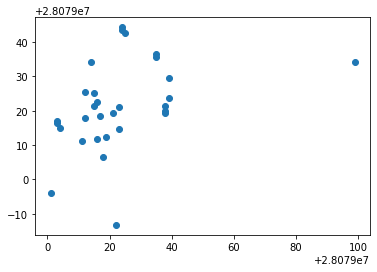

In [66]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [67]:
print(lr.score(x_test,y_test))

0.02464513414243885


In [68]:
lr.score(x_train,y_train)

0.25146199655215007

In [69]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [70]:
la.score(x_test,y_test)

0.04397655105215692

In [71]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [72]:
rr.score(x_test,y_test)

0.22993124538120824

In [73]:
b=StandardScaler().fit_transform(x)


In [74]:
p=LogisticRegression(max_iter=10000)
p.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [77]:
t=[[12,22,32,42,52,45,32,56,87]]

In [78]:
e=p.predict(t)
print(e)

[28079038]


In [79]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079009,
       28079011, 28079012, 28079014, 28079015, 28079016, 28079017,
       28079018, 28079019, 28079021, 28079022, 28079023, 28079024,
       28079025, 28079035, 28079036, 28079038, 28079039, 28079040,
       28079099], dtype=int64)

In [80]:
print(p.score(x_test,y_test))

0.6


In [81]:
p.predict_proba(t)[0][0]

5.9182949935112935e-09

In [82]:
p.predict_proba(t)[0][1]

2.930727825456518e-14

In [83]:
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [84]:
print(p.coef_)

[-0.          0.16219286 -2.42273686  1.17150106 -0.09080128 -0.16989962
  0.00365344 -3.59689515 -0.15675062]


In [85]:
print(p.intercept_)

28079054.958471376


In [86]:
print(p.predict(x_test))

[28079032.51972633 28079020.0594573  28079030.49686758 28079017.11909592
 28079021.31672144 28079020.12466236 28079023.70432896 28079016.98486817
 28079034.77237602 28079028.04586283 28079036.54797263 28079020.38477914
 28079016.16414208 28079019.59030551 28079024.77948695 28079018.23030756
 28079015.47143415 28079014.29154489 28079036.60099155 28079012.62451308
 28079017.4510934  28079017.38009769 28079033.98751611 28079011.03698269
 28079027.48868372 28079031.30354496 28079016.87426762 28079023.58692186
 28079020.79100769 28079020.08014243]


In [87]:
print(p.score(x_test,y_test))

0.21624274119315823


In [88]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
parameters={'max_depth':[1,53,67,3,57],
  'min_samples_leaf':[5,34,67,87,45],
           'n_estimators':[23,45,7,23,56]}

In [90]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 67, 3, 57],
                         'min_samples_leaf': [5, 34, 67, 87, 45],
                         'n_estimators': [23, 45, 7, 23, 56]},
             scoring='accuracy')

In [91]:
grid_search.best_score_

0.18571428571428572

In [92]:
rfc_best=grid_search.best_estimator_

[Text(1046.25, 2473.38, 'X[3] <= 5.4\ngini = 0.945\nsamples = 44\nvalue = [2, 1, 3, 6, 2, 5, 4, 2, 4, 2, 0, 1, 1, 3\n5, 5, 2, 3, 1, 4, 2, 0, 5, 5, 2]'),
 Text(697.5, 2092.8599999999997, 'X[4] <= 0.105\ngini = 0.941\nsamples = 39\nvalue = [2, 1, 3, 0, 2, 5, 4, 2, 4, 2, 0, 1, 1, 3\n5, 5, 2, 3, 1, 1, 2, 0, 5, 5, 1]'),
 Text(348.75, 1712.34, 'gini = 0.571\nsamples = 5\nvalue = [0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(1046.25, 1712.34, 'X[0] <= 3.925\ngini = 0.931\nsamples = 34\nvalue = [2, 1, 3, 0, 0, 5, 0, 2, 4, 2, 0, 1, 1, 3\n5, 5, 2, 3, 1, 0, 2, 0, 5, 5, 1]'),
 Text(697.5, 1331.82, 'gini = 0.757\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0\n0, 5, 2, 3, 1, 0, 0, 0, 0, 0, 1]'),
 Text(1395.0, 1331.82, 'X[1] <= 0.355\ngini = 0.906\nsamples = 25\nvalue = [2, 1, 3, 0, 0, 5, 0, 2, 4, 1, 0, 1, 1, 3\n5, 0, 0, 0, 0, 0, 2, 0, 5, 5, 0]'),
 Text(1046.25, 951.3, 'gini = 0.681\nsamples = 8\nvalue = [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

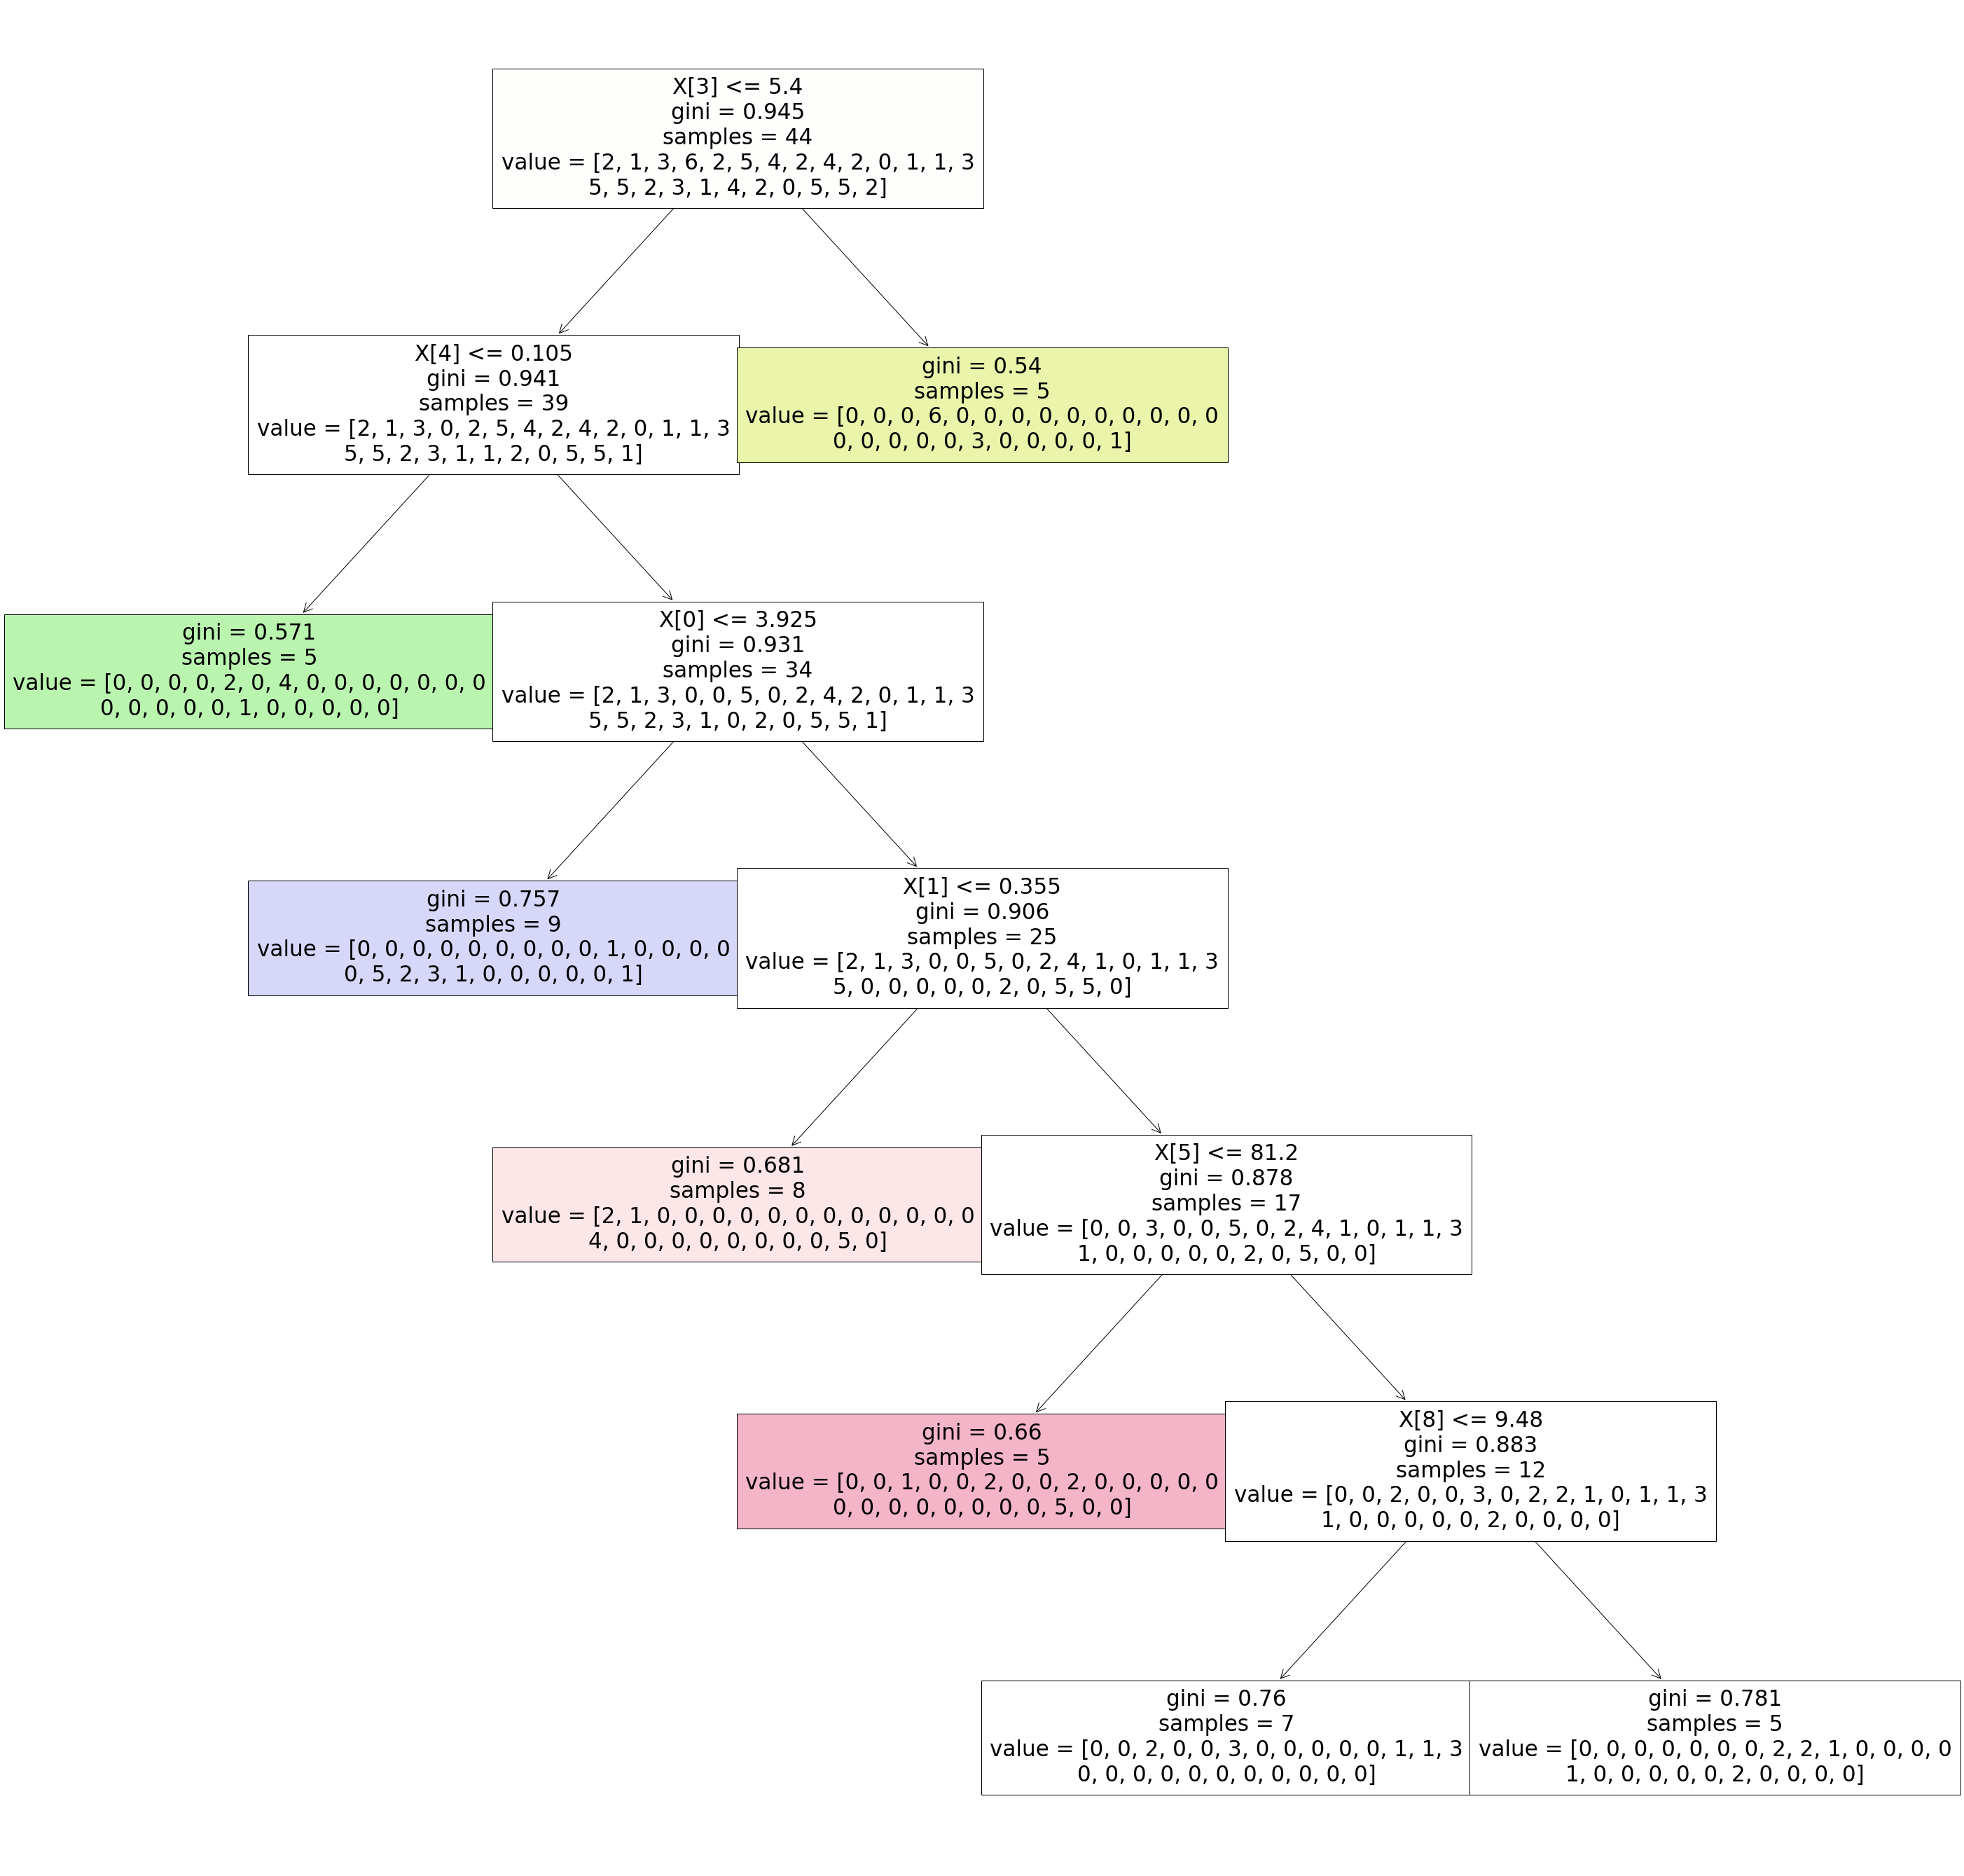

In [93]:
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:LOGISTIC SCORE=0.6 is a Highest accuracy